# Figure 1

In [1]:
using Plots, CSV, DataFrames, Jedi, Statistics, Measures, LaTeXStrings

# set plotting style
Jedi.default_pyplot!()

Plots.PyPlotBackend()

### Load data

In [2]:
# Read data file
df = CSV.read("../outputs/script1_sub_results.csv")

# Compute mean and variance
gdf = groupby(df, [:l, :rho])
cdf = combine(:gamma => (x) -> (mean=mean(x), variance=var(x)), gdf);

In [3]:
N = 1000
f0 = 50/2N
fl = 0.3/2N
F = Jedi.fermi_fitness(f0=f0, fl=fl)

fermi_fitness(10, 1.0, 0.025, 0.00015, Jedi.Est)

### Plot empty landscape

In [4]:
g_arr = 0:0.01:1 |> collect
l_arr = 8:40 |> collect

f_arr = zeros(Float64, length(g_arr), length(l_arr))

for (i, g) in enumerate(g_arr)
    for (j, l) in enumerate(l_arr)
        f_arr[i, j] = fitness(2l * g, l, F)
    end
end

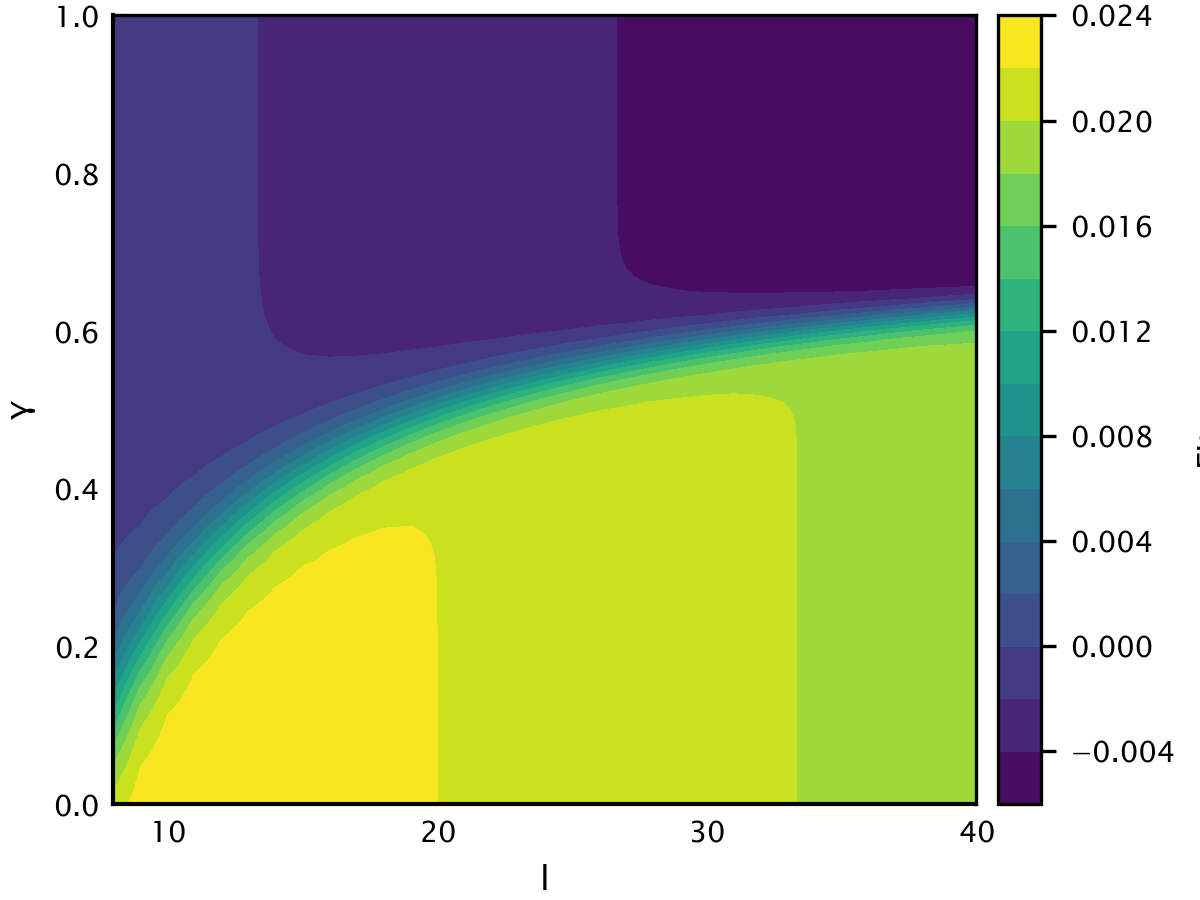

In [5]:
contourf(
    l_arr, 
    g_arr, 
    f_arr, 
    color=:viridis, 
    xlabel="l", 
    ylabel="γ", 
    colorbar_title="Fitness", 
    size=(400,300),
    frame=true,
    dpi=300
)

In [6]:
savefig("../figures/2Dfitness.pdf")

In [7]:
g = collect(0:0.01:1)
f_exp = f0 .* (1 .- exp.(2g.*10 .- (6/4 *10) .+ 10))

101-element Array{Float64,1}:
      0.024831551325022863
      0.0247942563237745
      0.024748704106384162
      0.02469306650242329
      0.02462511057948806
      0.024542109027781644
      0.024440730703595863
      0.02431690693881769
      0.02416566825099185
      0.023980944900540844
      0.023755323290803404
      0.023479748434369552
      0.023143160544641654
      ⋮
  -9055.411240281204
 -11060.309800223013
 -13509.09843116729
 -16500.05561915395
 -20153.218978099787
 -24615.202780725805
 -30065.08210411942
 -36721.57974135235
 -44851.8443151553
 -54782.17189017033
 -66911.10137972746
 -81725.40931180277

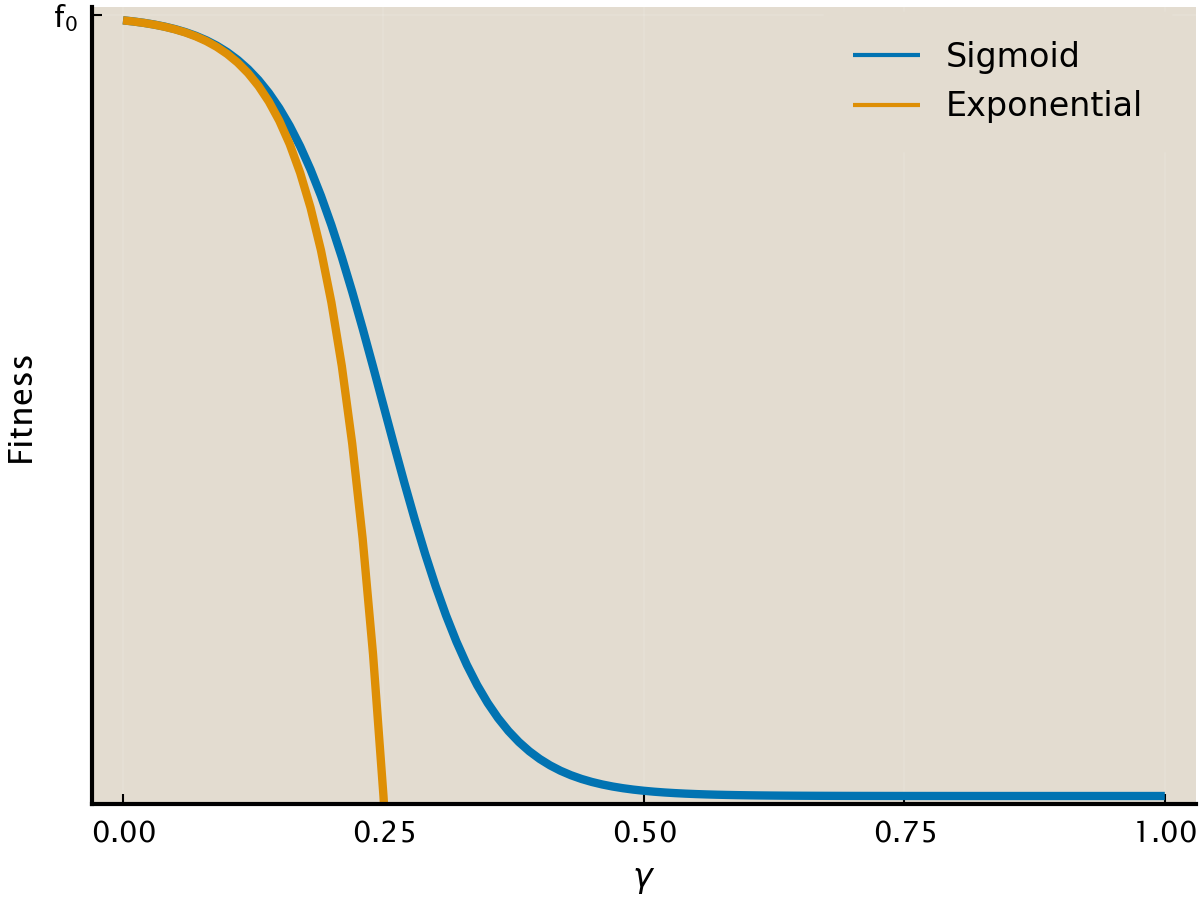

In [16]:
plot(
    0:0.01:1,
    f_arr[:, 3].+ fl*10,
    linewidth=2,
    ylim=(-f0 * 0.01, f0*1.01),
    yticks=([f0], [L"$f_0$"]),
    xlabel=L"$\gamma$",
    ylabel="Fitness",
    size=(400,300),
    dpi=300,
    label="Sigmoid",
    legend=(0.65, 0.8)
    )
plot!(
    0:0.01:1,
    f_exp,
    linewidth=2,
    label="Exponential"
    )

In [17]:
savefig("../figures/1Dfitness.pdf")

### Add theory predictions

In [10]:
function theoretical(rho::Real, lrange::Tuple{Int, Int}=(8, 40))

    gamma_mean = zeros(lrange[2]-lrange[1]+1)

    for (j, l_0) in enumerate(lrange[1]:lrange[2])
        F.l = l_0

        Q_0_smooth = zeros(Float64, l_0+1)

        for (i, l) in enumerate(0:l_0)
            Q_0_smooth[i] = exp(-1/2*(l-l_0/4*3)^2/(3*l_0/16)) * exp(2N/(1+rho)*fitness(2l, F))
        end
        gamma_mean[j] = sum(Q_0_smooth .* collect(0:l_0)) / sum(Q_0_smooth) / l_0
    end
    return gamma_mean
end

theoretical (generic function with 2 methods)

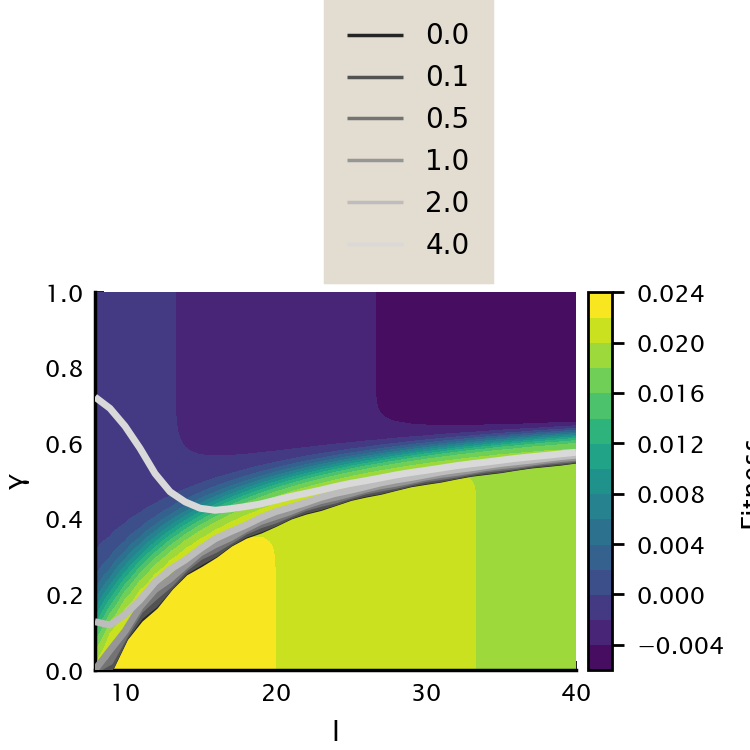

In [11]:
contourf(
    l_arr, 
    g_arr, 
    f_arr, 
    color=:viridis, 
    xlabel="l", 
    ylabel="γ", 
    colorbar_title="Fitness", 
    colorbar_ticks=([]),
    legend=(0.45, 0.99)
)

for (i, rho) in enumerate([0, 0.1, 0.5, 1, 2, 4])
    plot!(8:40, theoretical(rho), widen=false, linewidth=2, color=cgrad(:Greys_7, rev=true)[i], label="$rho")
end
plot!()